<a href="https://colab.research.google.com/github/kojeda603/ciencia_datos_2025/blob/main/07_Clase_3_1_TAREA_1_y_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("endofnight17j03/iris-classification")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris-classification' dataset.
Path to dataset files: /kaggle/input/iris-classification


In [ ]:
!pip install statsmodels
!pip install wquantiles
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset dari CSV di Kaggle
data_path = '/kaggle/input/iris-classification/IRIS.csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
#Media
print(df["sepal_length"].mean())
print(df["sepal_width"].mean())
print(df["petal_length"].mean())
print(df["petal_width"].mean())

5.843333333333334
3.0540000000000003
3.758666666666666
1.1986666666666668


In [ ]:
#Media trucada
print(trim_mean(df["sepal_length"],0.1))
print(trim_mean(df["sepal_width"],0.1))
print(trim_mean(df["petal_length"],0.1))
print(trim_mean(df["petal_width"],0.1))


5.8083333333333345
3.0391666666666666
3.7608333333333333
1.1841666666666668


In [ ]:
#Media ponderada
print(np.average(df["sepal_length"]))
print(np.average(df["sepal_width"]))
print(np.average(df["petal_length"]))
print(np.average(df["petal_width"]))

5.843333333333334
3.0540000000000003
3.758666666666666
1.1986666666666668


In [ ]:
#Mediana
print(df["sepal_length"].median())
print(df["sepal_width"].median())
print(df["petal_length"].median())
print(df["petal_width"].median())

5.8
3.0
4.35
1.3


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>,
        <Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

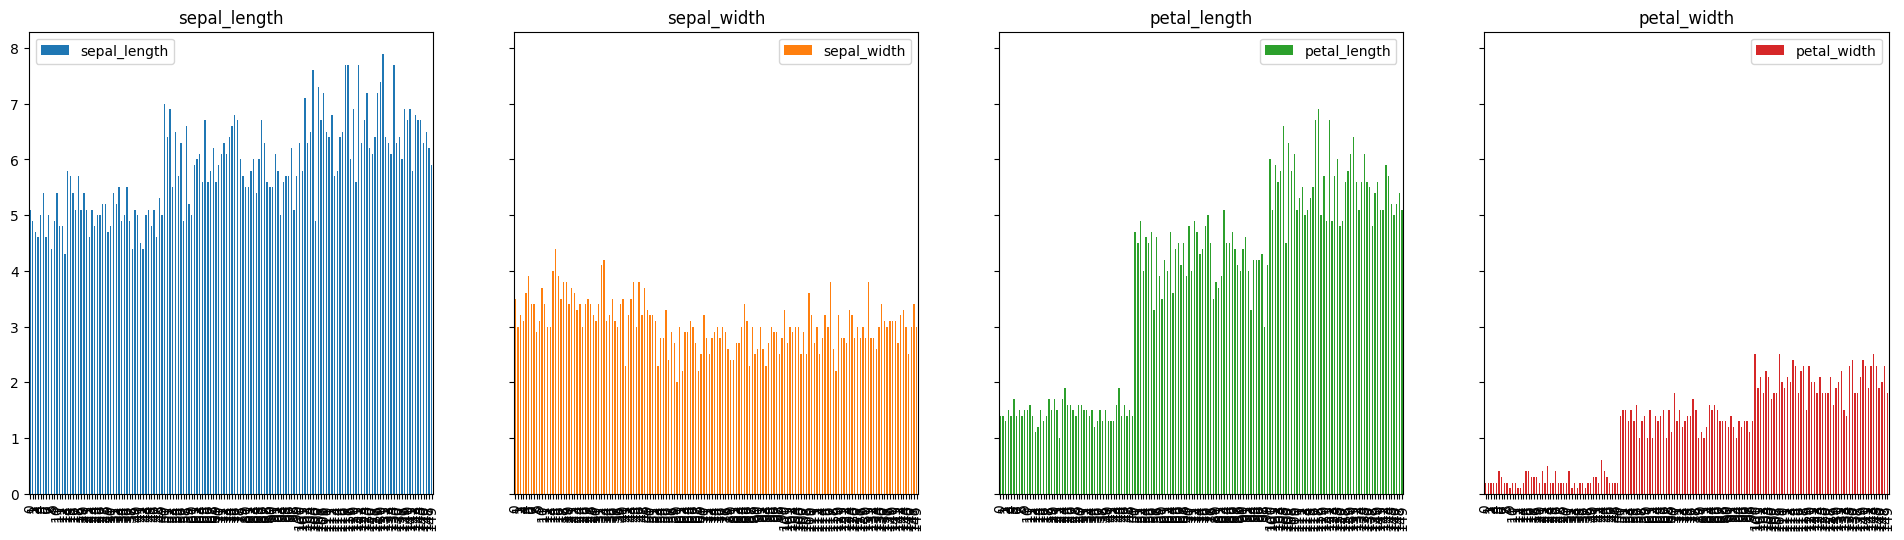

In [ ]:
df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].plot(kind="bar", subplots=True, layout=(1, 4), figsize=(24, 6), sharex=True, sharey=True)


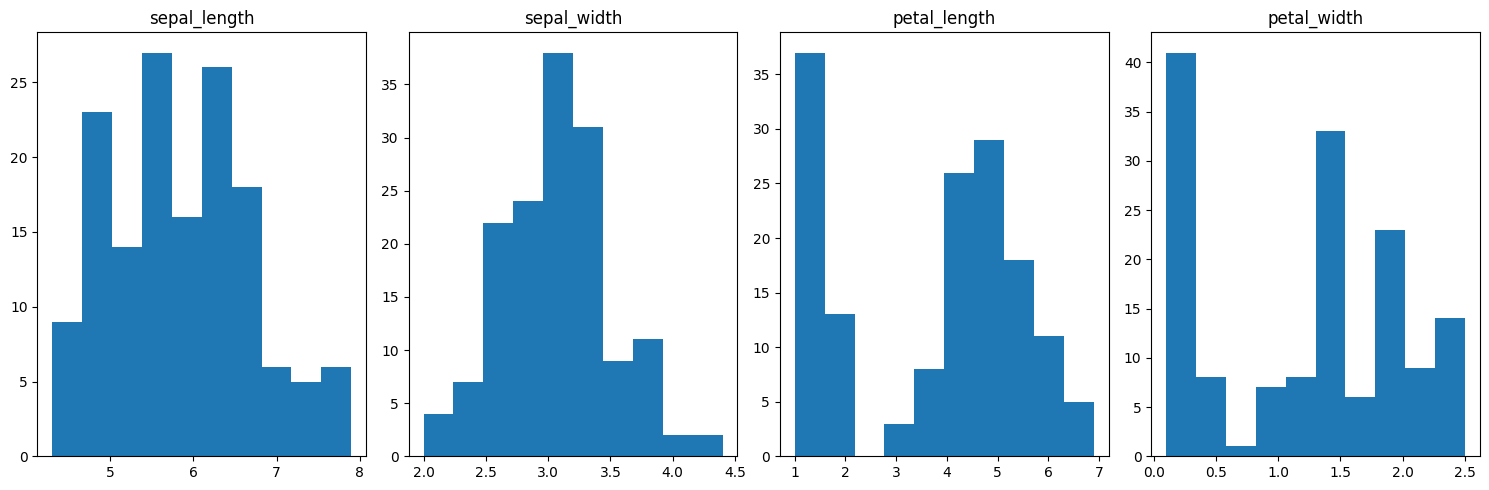

In [ ]:
axes = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].hist(
    figsize=(15, 5), layout=(1, 4)
)

# Quitar las cuadrículas de todos los subplots
for ax in axes.flatten():
    ax.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

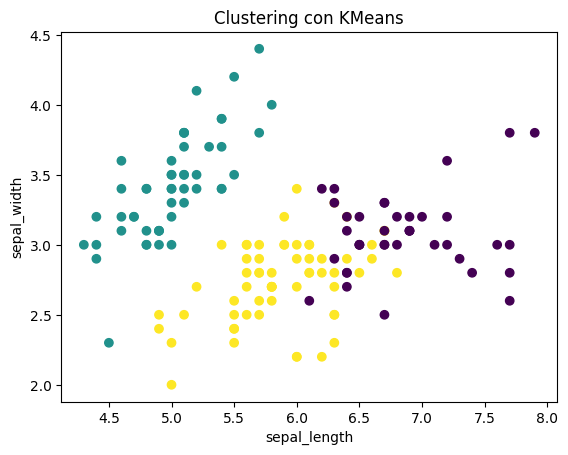

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecciona las columnas que quieres usar para el clustering
# Por ejemplo, si las columnas tienen estos nombres, ajústalo según tu dataset:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Crear el modelo KMeans con 3 clusters (porque hay 3 especies)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtener etiquetas de cluster asignadas
clusters = kmeans.labels_

# Agregar la columna de clusters al dataframe original
df['cluster'] = clusters

# Visualizar clusters usando solo dos características para graficar (ejemplo: sepal_length vs sepal_width)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'], cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Clustering con KMeans')
plt.show()


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

In [ ]:
sepalo_largo=df.groupby(["species"])["sepal_length"].max()
sepalo_largo

,sepal_length
species,
Iris-setosa,5.8
Iris-versicolor,7.0
Iris-virginica,7.9


In [ ]:
petalo_largo=df.groupby(["species"])["petal_length"].max()
petalo_largo

,petal_length
species,
Iris-setosa,1.9
Iris-versicolor,5.1
Iris-virginica,6.9


In [ ]:
#Calcular desviacion estandar
print(df["sepal_length"].std())
print(df["petal_length"].std())

0.8280661279778629
1.7644204199522617


In [ ]:
#Calcular IQR
print(df["sepal_length"].quantile(0.75)-df["sepal_length"].quantile(0.25))
print(df["petal_length"].quantile(0.75)-df["petal_length"].quantile(0.25))

1.3000000000000007
3.4999999999999996


In [ ]:
#Calcular MAD
print(robust.scale.mad(df["sepal_length"]))
print(robust.scale.mad(df["petal_length"]))

1.0378215529539216
1.8532527731320025


In [ ]:
df["sepal_length"].quantile([0.5,0.25,0.5,0.75,0.95])


,sepal_length
0.50,5.800
0.25,5.100
0.50,5.800
0.75,6.400
0.95,7.255


In [ ]:
df["petal_length"].quantile([0.5,0.25,0.5,0.75,0.95])


,petal_length
0.50,4.35
0.25,1.60
0.50,4.35
0.75,5.10
0.95,6.10


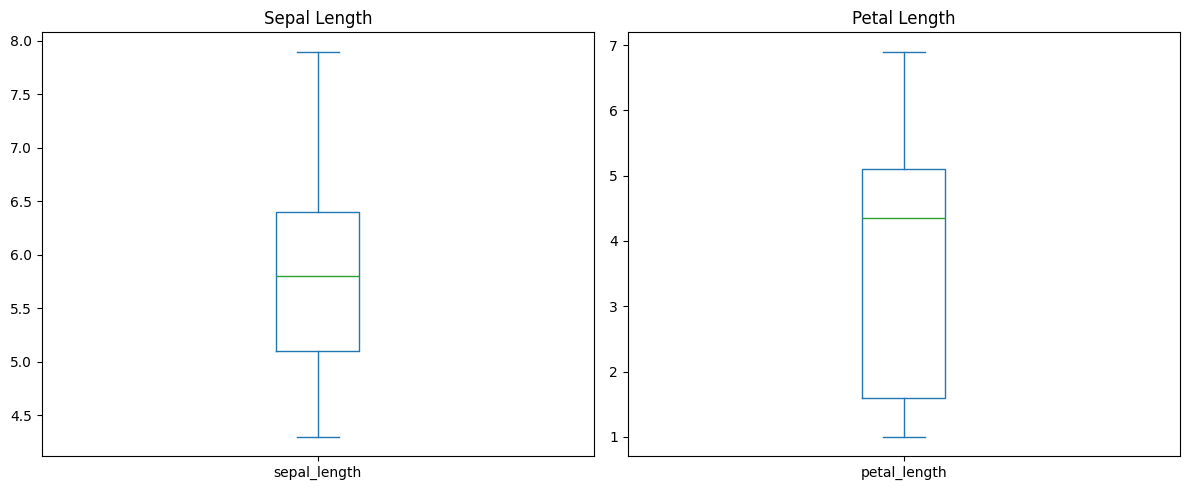

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Sepal Length
df["sepal_length"].plot.box(ax=axes[0])
axes[0].set_title("Sepal Length")

# Petal Length
df["petal_length"].plot.box(ax=axes[1])
axes[1].set_title("Petal Length")

plt.tight_layout()
plt.show()

In [ ]:
#Calcular tabla de frecuencia e histogramas
binned_sepal_length=pd.cut(df["sepal_length"],10)
binned_sepal_length.value_counts()

,count
sepal_length,
"(5.38, 5.74]",27
"(4.66, 5.02]",23
"(5.74, 6.1]",22
"(6.1, 6.46]",20
"(6.46, 6.82]",18
"(5.02, 5.38]",14
"(4.296, 4.66]",9
"(6.82, 7.18]",6
"(7.54, 7.9]",6


In [ ]:
binned_sepal_length=pd.cut(df["petal_length"],10)
binned_sepal_length.value_counts()


,count
petal_length,
"(0.994, 1.59]",37
"(4.54, 5.13]",29
"(3.95, 4.54]",26
"(5.13, 5.72]",18
"(1.59, 2.18]",13
"(5.72, 6.31]",11
"(3.36, 3.95]",8
"(6.31, 6.9]",5
"(2.77, 3.36]",3


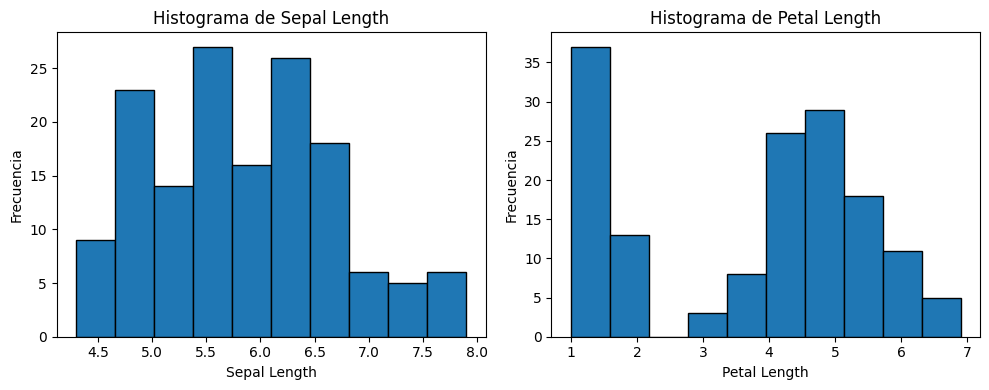

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Histograma Sepal Length
df["sepal_length"].plot.hist(ax=axes[0], bins=10, edgecolor="black")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Histograma de Sepal Length")

# Histograma Petal Length
df["petal_length"].plot.hist(ax=axes[1], bins=10, edgecolor="black")
axes[1].set_xlabel("Petal Length")
axes[1].set_ylabel("Frecuencia")
axes[1].set_title("Histograma de Petal Length")

plt.tight_layout()
plt.show()


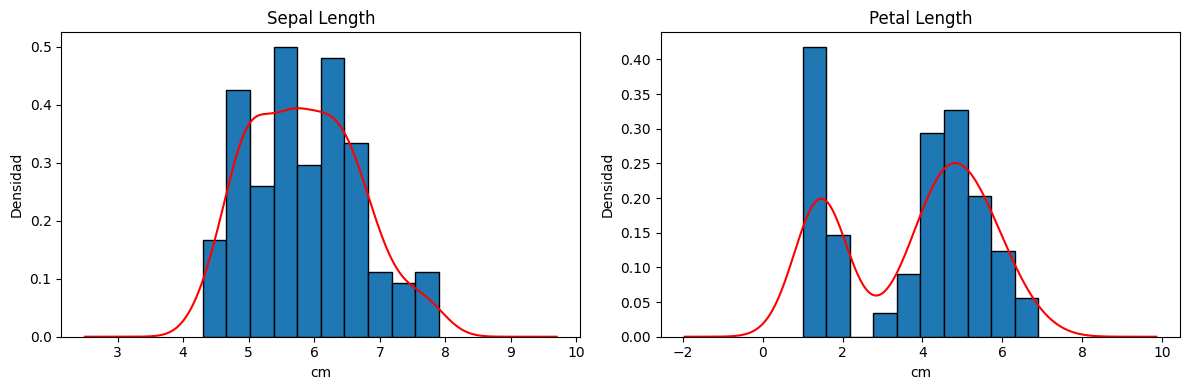

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# Sepal Length
df["sepal_length"].plot.hist(density=True, bins=10, edgecolor="black", ax=axes[0])

df["sepal_length"].plot.density(ax=axes[0], color="red")
axes[0].set_title("Sepal Length")
axes[0].set_xlabel("cm")
axes[0].set_ylabel("Densidad")

# Petal Length
df["petal_length"].plot.hist(density=True, bins=10, edgecolor="black", ax=axes[1])

df["petal_length"].plot.density(ax=axes[1], color="red")
axes[1].set_title("Petal Length")
axes[1].set_xlabel("cm")
axes[1].set_ylabel("Densidad")

plt.tight_layout()
plt.show()
